<a href="https://colab.research.google.com/github/GerardoMunoz/PresentacionesAlgebraLineal/blob/main/AL11_SubespRn_Co_Nu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#%pylab inline
from matplotlib import pyplot as plt
from matplotlib import animation,rc
#pylab.rcParams['figure.figsize'] = (10, 5)
import sympy as sp
import numpy as np



def ejes2d(x0,y0,x1,y1,k=1):
    ax = plt.axes([0.,0.,k,k*1.34*(y1-y0)/(x1-x0)])
    ax.set_xlim(x0,x1)
    ax.set_ylim(y0,y1)
    punto2d(ax,(0,0),nombre=r'$\vec{0}$')
    return ax


def linea2d(ax,u,v=(0,0),color='k',**kwargs):
    ax.plot((u[0],v[0]),(u[1],v[1]),color)
        
def punto2d(ax,v,nombre='',fontsize=15,color='k',**kwargs):
    ax.scatter(*v,s=20,color=color)
    if nombre!='':
        ax.text(v[0],v[1],nombre,fontsize=fontsize,color=color)        

def ejes3d(x0,y0,z0,x1,y1,z1,ejes='x'):
    fig=plt.figure(figsize=(8,6),dpi=80)
    ax=fig.add_subplot(111,projection='3d')
    ax.set_xlim([x0,x1])
    ax.set_ylim([y0,y1])
    ax.set_zlim([z0,z1])
    ax.set_xlabel('$'+ejes+'_0$')
    ax.set_ylabel('$'+ejes+'_1$')
    ax.set_zlabel('$'+ejes+'_2$')
    punto3d(ax,(0,0,0),nombre=r'$\vec{0}$')

    return fig,ax


def dibujo():                           # En esta rutina se colocan los puntos y líneas para la animación
    return fig,    

def animacion_paso_3d(ax,fig,angulo):
    ax.view_init(elev=10., azim=angulo)
    return fig, 

def animacion3d(fig,ax,dibujo=dibujo, fps=5, segundos=1):
    rc('animation', html='jshtml')
    frames=fps*segundos
    return animation.FuncAnimation(fig, lambda i : animacion_paso_3d(ax,fig,i/frames*90), init_func=dibujo,
                               frames=frames, interval=int(1000/fps), blit=True)

def linea3d(ax,u,v=(0,0,0),color='k',**kwargs):
    ax.plot((u[0],v[0]),(u[1],v[1]),(u[2],v[2]),color)

def plano3d(ax,u,v,color='k',**kwargs):
    x_min,x_max=ax.get_xlim()
    y_min,y_max=ax.get_ylim()
    det=u[0]*v[1]-u[1]*v[0]     #Usando Cramer para encontrar los puntos de corte del plano
    kx=(v[1]*u[2]-u[1]*v[2])/det
    ky=-(v[0]*u[2]-u[0]*v[2])/det

    xx=[[x_min,x_max],[x_min,x_max]]
    yy=[[y_min,y_min],[y_max,y_max]]
    zz=np.array([
        [kx*x_min+ky*y_min,kx*x_max+ky*y_min],
        [kx*x_min+ky*y_max,kx*x_max+ky*y_max]
       ]).astype(np.float64)

    ax.plot_surface(xx, yy, zz, alpha=0.2)

    
def punto3d(ax,v,nombre='',fontsize=15, c="goldenrod",**kwargs):
    ax.scatter(v[0],v[1],float(v[2]), marker='o', s=20, c="goldenrod", alpha=0.6)
    if nombre!='':
        ax.text(v[0],v[1],v[2],nombre,fontsize=fontsize)        

        
def juntar(*columnas):# apilar para col_join
    A=columnas[0]
    for columna in columnas[1:]:
        A=A.row_join(columna)
    return A

def p(v):
    return '('+', '.join([str(ai) for ai in v])+')ᵀ'


# Subespacio de $\mathbb{R}^n$
En [Nakos, pg 226] se presenata la siguiente definición:
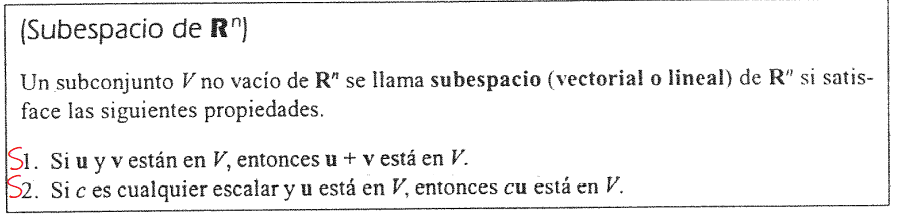

S1 y S2 es equivalente a la siguiente afirmación:

* Si $\mathbf{u},\mathbf{v} \in V$ entonces todas sus combinaciones lineales también están en $V$. Es decir $c\mathbf{u} + d\mathbf{v} \in V$ con $c,d \in \mathbb{R}$

Que a su vez es equivalente a:

* Si $\mathbf{v_1},\mathbf{v_2},\mathbf{v_3}, \ldots ,\mathbf{v_n} \in V$ entonces todas sus combinaciones lineales también están en $V$.  $c_1\mathbf{v_1} + c_2\mathbf{v_2} + c_3\mathbf{v_3} + \cdots c_n\mathbf{v_n} \in V$ con y $c_1,c_2,\ldots,c_n \in \mathbb{R}$

## Teorema:

$V$ es un subespacio de $\mathbb{R}^n$ 

**si y sólo si**

existe al menos un conjunto $S= \{v_1, v_2, v_3, \ldots , v_k \} \in V$ tal que $V = \text{Ge}(S)$ 


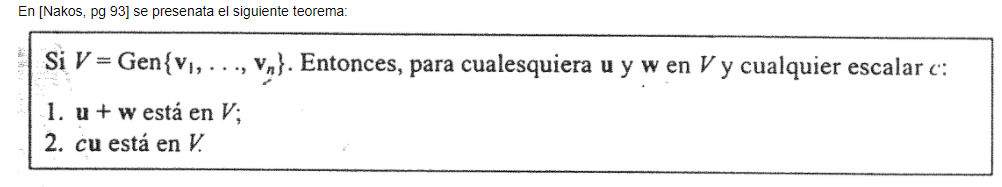

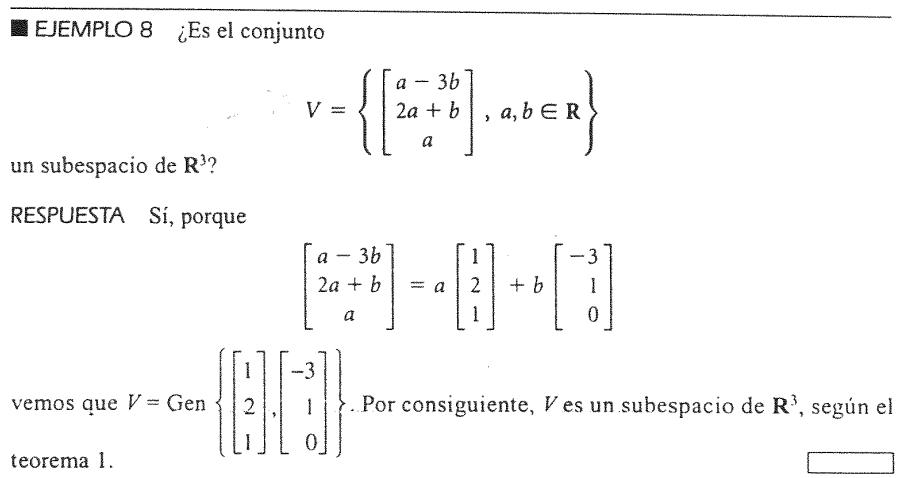

# Teorema de reducción del conjunto generador [ Nakos,  2.3.9, pg 92]

Si uno de los vectores $\vec{v}_1, \vec{v}_2, \ldots \vec{v}_k$ es combinación lineal de los demás, el espacio generado permanece igual si se elimina ese vector.

## Definición
El espacio generado por el conjunto de las columnas $\{v_1, v_2, \ldots, v_n\}$ de una matriz $A=[v_1\ \  v_2\ \  \ldots\ \  v_n]$ también se llama el **espacio columna** de la matriz $A$ 

$$\text{Co}(A)=\text{Ge}\{v_1, v_2, \ldots, v_n\}$$


## Corolario
El espacio columna de una matriz no varía si se suprimen las columnas sin **l-pivote** (lugar del pivote en una matriz escalón equivalente).


## Definición
Una matriz $A$ en la que no se le puede suprimir ninguna columna (es decir, tiene un l-pivote en cada columna) es una **base** de su espacio columna, $\text{Co}(A)$. Por lo tanto, el conjunto de las columnas de esa matriz $A$ forma una **base** del espacio generado por sus columnas.  


Por ejemplo, sabiendo que 

$\left[\matrix{1&2&3&5\\2&2&4&6\\3&2&5&7}\right] \sim \left[\matrix{1&2&3&5\\0&-2&-2&-4\\0&-4&-4&-8}\right] \sim \left[\matrix{1&2&3&5\\0&-2&-2&-4\\0 & 0 & 0 & 0}\right]$

Concluimos que 

$\left[\matrix{1&2\\2&2\\3&2}\right]$  es una base de 
$\text{Co}\left(\left[\matrix{1&2&3&5\\2&2&4&6\\3&2&5&7}\right]\right)$

Que equivale a

$\left\{\begin{pmatrix}1\\2\\3\end{pmatrix},\begin{pmatrix}2\\2\\2\end{pmatrix}\right\}$ es una base de $\text{Ge}\left\{\begin{pmatrix}1\\2\\3\end{pmatrix},\begin{pmatrix}2\\2\\2\end{pmatrix},\begin{pmatrix}3\\4\\5\end{pmatrix},\begin{pmatrix}5\\6\\7\end{pmatrix}\right\}$


## Definición
El número de vectores de una bese de un espacio generado $\text{Ge}(S)$  se llama la **dimensión** de $\text{Ge}(S)$. Se escribe $\text{Dim}(\text{Ge}(S))$.

En el anterior ejemplo,  $\text{Dim}\left(\text{Ge}\left\{\begin{pmatrix}1\\2\\3\end{pmatrix},\begin{pmatrix}2\\2\\2\end{pmatrix},\begin{pmatrix}3\\4\\5\end{pmatrix},\begin{pmatrix}5\\6\\7\end{pmatrix}\right\}\right)=2$.

La dimensión del espacio columna de una matriz $A$ se conoce como el **rango** de $A$. Se escribe $\rho(A)=\text{Dim}(\text{Co}(A))$


Siguiendo con el ejemplo,  $\rho\left(\left[\matrix{1&2&3&5\\2&2&4&6\\3&2&5&7}\right]\right)=2$

Es de resaltar que para cualquier matriz $A$

$\rho(A)$, o el rango de $A$, es el número de l-pivotes de $A$.
---------

# Subespacios de $\mathbb{R}^2$

| Dimensión | Representación geométrica | 
|  -        |        -        |
|   0       | Es el origen       |
|1 |         Es una recta que pasa por el origen y por ...|
|2 |  Es todo $\mathbb{R}^2$ | 

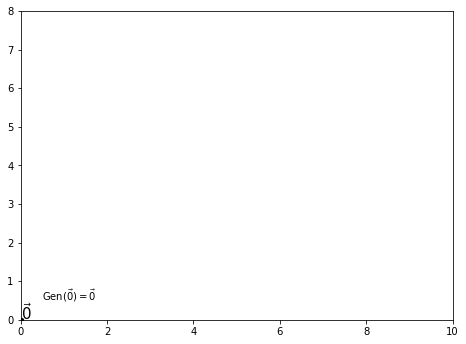

In [3]:
ax=ejes2d(0,0,10,8)
ax.text(0.5,0.5,r'Gen($\vec{0}$)$=\vec{0}$')#,rotation=34)
plt.show()

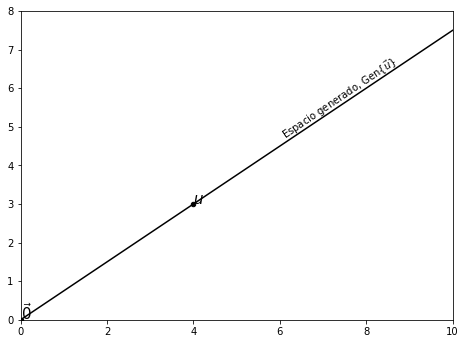

In [4]:
u2=sp.Matrix([4,3])
ax=ejes2d(0,0,10,8)
punto2d(ax,u2,nombre='$u$') 
linea2d(ax,u2*5/2,nombre='$u$')  
ax.text(6,4.7,r'Espacio generado, Gen$\{\vec{u}\}$',rotation=34)

plt.show()

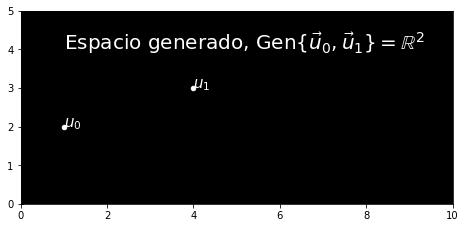

In [5]:
u2_0=sp.Matrix([1,2])
u2_1=sp.Matrix([4,3])

ax=ejes2d(0,0,10,5)
punto2d(ax,u2_0,nombre='$u_0$',color='w') 
punto2d(ax,u2_1,nombre='$u_1$',color='w') 
ax.text(1,4,
        r'Espacio generado, Gen$\{\vec{u}_0,\vec{u}_1\}=\mathbb{R}^2$',
        color='w',
        fontsize=20
       )

ax.set_facecolor('black')
plt.show()

Pero si un vector es combinación lineal del otro, no se genera $\mathbb{R}^2$.

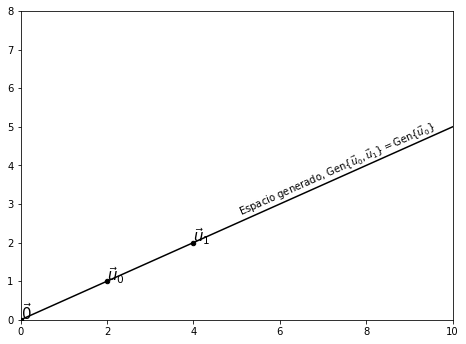

In [6]:
u3_0=sp.Matrix([2,1])
u3_1=sp.Matrix([4,2])
ax=ejes2d(0,0,10,8)
punto2d(ax,u3_0,nombre=r'$\vec{u}_0$') 
punto2d(ax,u3_1,nombre=r'$\vec{u}_1$') 
linea2d(ax,u3_1*5/2,nombre='$u$')  
ax.text(5,2.7,r'Espacio generado, Gen$\{\vec{u}_0,\vec{u}_1\}=$Gen$\{\vec{u}_0\}$',rotation=24)

plt.show()

# Subespacios de $\mathbb{R}^3$

| Dimensión | Representación geométrica | 
|  -        |        -        |
|   0       | Es el origen       |
|1 |         Es una recta que pasa por el origen y por ...|
|2 |  Es un plano que pasa por el origen, por ... y por ... | 
|3 |  Es todo $\mathbb{R}^3$ | 

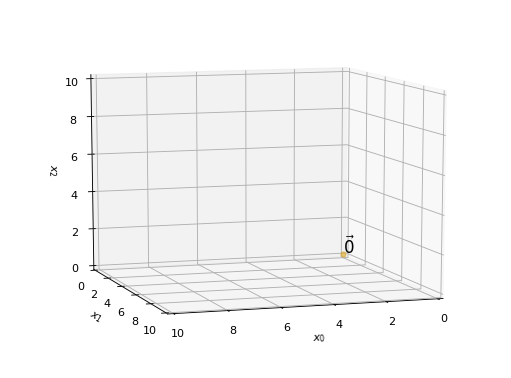

In [7]:
fig,ax=ejes3d(0,0,0,10,10,10)  # Define el eje de coordenadas
                              # Desde la coordenada (0,0,0)ₜ
                              # Hasta la coordenada (10,10,10)ₜ

animacion3d(fig,ax)  # Genera la animación para rotar  

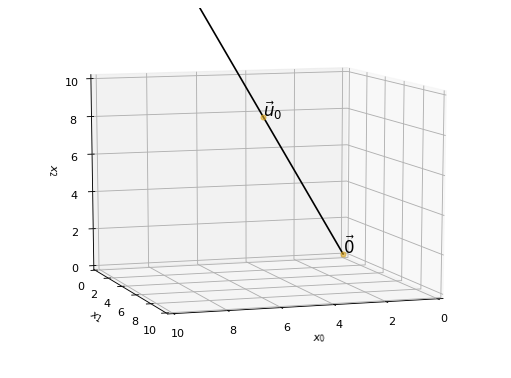

In [8]:
fig,ax=ejes3d(0,0,0,10,10,10)  # Define el eje de coordenadas
                              # Desde la coordenada (0,0,0)ₜ
                              # Hasta la coordenada (10,10,10)ₜ
u4_0=sp.Matrix([4,2,8])
punto3d(ax,u4_0,nombre=r'$\vec{u}_0$')  # Coloca el punto
linea3d(ax,2.1*u4_0)  # Coloca  las línea entre dos extremos, si solo hay un extremo el otro es el origen

animacion3d(fig,ax)  # Genera la animación para rotar  

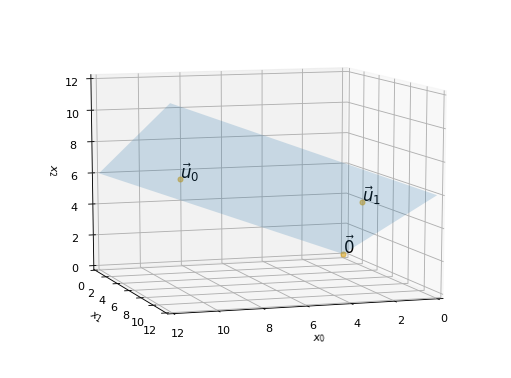

In [9]:
fig,ax=ejes3d(0,0,0,12,12,12)  # Define el eje de coordenadas
                              # Desde la coordenada (0,0,0)ₜ
                              # Hasta la coordenada (10,10,10)ₜ
u=sp.Matrix([9,3,6])
v=sp.Matrix([2,8,5])

punto3d(ax,u,nombre=r'$\vec{u}_0$')  # Coloca el punto
punto3d(ax,v,nombre=r'$\vec{u}_1$')  # Coloca el punto
plano3d(ax,u,v,color='k')

animacion3d(fig,ax)  # Genera la animación para rotar  


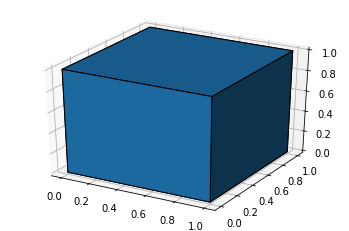

In [10]:
# Omitir este código
# Este código pretende ilustrar que el espacio generado es todo R**3
#from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.voxels(np.ones((1,1,1)), edgecolor="k")
plt.show()

## Vectores generados y sistema de ecuaciones consistente

¿$\text{Ge}\left\{  
\begin{pmatrix}1\\5\\8\end{pmatrix},
\begin{pmatrix}2\\6\\9\end{pmatrix},
\begin{pmatrix}3\\7\\11\end{pmatrix}
\right\}= \mathbb{R}^3$?

Si $A=\left[\begin{matrix}1 & 2 & 3 \\5 & 6 & 7 \\8 & 9 & 11 \end{matrix}\right]$ entonces ¿es $\text{Co}\left(A\right)= \mathbb{R}^3$?

Será $x_1\begin{pmatrix}1\\5\\8\end{pmatrix}+
x_2\begin{pmatrix}2\\6\\9\end{pmatrix}+
x_3\begin{pmatrix}3\\7\\11\end{pmatrix}
=\begin{pmatrix}b_0\\b_1\\b_2\end{pmatrix}$
consistente para cualquier vector de términos constantes (VTC) $\vec{b}=\begin{pmatrix}b_0\\b_1\\b_2\end{pmatrix}$



In [11]:
b0,b1,b2=sp.symbols('b_0 b_1 b_2')
Ab=sp.Matrix([[1,2,3,b0],
             [5,6,7,b1],
             [8,9,11,b1]])

Ab

Matrix([
[1, 2,  3, b_0],
[5, 6,  7, b_1],
[8, 9, 11, b_1]])

In [12]:
# Copiamos los datos de la matriz en M para modificarla
M=Ab[:,:] 
M

Matrix([
[1, 2,  3, b_0],
[5, 6,  7, b_1],
[8, 9, 11, b_1]])

In [13]:
M[1,:]+=M[0,:]*(-5)
M[2,:]+=M[0,:]*(-8)
M

Matrix([
[1,  2,   3,          b_0],
[0, -4,  -8, -5*b_0 + b_1],
[0, -7, -13, -8*b_0 + b_1]])

In [14]:
M[2,:]+=M[1,:]*-7/4
M

Matrix([
[1,  2,  3,               b_0],
[0, -4, -8,      -5*b_0 + b_1],
[0,  0,  1, 3*b_0/4 - 3*b_1/4]])

* Como en cada renglón de la matriz de coeficientes $A$, tiene <u> un l-pivote en cada renglón </u>. 
* Entonces, no es posible que haya pivotes en los términos constantes. 
* Por lo tanto, este sistema de ecuaciones será consistente para cualquier vector de términos constantes (VTC) $\vec{b}=\begin{pmatrix}b_0\\b_1\\b_2\end{pmatrix}$. 
* Lo cual permite concluir que los tres vectores efectivamente <u> generan $\mathbb{R}^3$ </u>

Lo anterior ilustra las siguientes afirmaciones equivalente, para cualquier matriz $A$ de tamaño $m \times n$:

* $\text{Co}(A)=\mathbb{R}^m$
* El espacio generado por los vectores columna de $A$ es todo $\mathbb{R}^m$
* $[A:\vec{b}]$ consistente para cualquier $\vec{b}$
* La matriz de coeficientes $A$ tiene un l-pivote en cada <u>renglón</u>
* Si $\rho(A)=m$,  entonces $\text{Co}(A)=\mathbb{R}^m$

## Estudio de caso cuando no genera todo el espacio.

In [15]:
u=sp.Matrix([9,3,6])
v=sp.Matrix([2,8,5])
print(sp.latex(u),sp.latex(v))

\left[\begin{matrix}9\\3\\6\end{matrix}\right] \left[\begin{matrix}2\\8\\5\end{matrix}\right]


$x_1\left(\begin{matrix}9\\3\\6\end{matrix}\right) + x_2 \left(\begin{matrix}2\\8\\5\end{matrix}\right)=\begin{pmatrix}b_0\\b_1\\b_2\end{pmatrix}$

In [16]:
Ab_otra=sp.Matrix([[9,2,b0],[3,8,b1],[6,5,b2]])
Ab_otra

Matrix([
[9, 2, b_0],
[3, 8, b_1],
[6, 5, b_2]])

In [17]:
M=Ab_otra
M

Matrix([
[9, 2, b_0],
[3, 8, b_1],
[6, 5, b_2]])

In [18]:
M.row_swap(0,1)
M

Matrix([
[3, 8, b_1],
[9, 2, b_0],
[6, 5, b_2]])

In [19]:
M[1,:]+=M[0,:]*(-3)
M[2,:]+=M[0,:]*(-2)
M

Matrix([
[3,   8,          b_1],
[0, -22,  b_0 - 3*b_1],
[0, -11, -2*b_1 + b_2]])

In [20]:
M.row_swap(1,2)
M

Matrix([
[3,   8,          b_1],
[0, -11, -2*b_1 + b_2],
[0, -22,  b_0 - 3*b_1]])

In [21]:
M[2,:]+=M[1,:]*(-2)
M

Matrix([
[3,   8,               b_1],
[0, -11,      -2*b_1 + b_2],
[0,   0, b_0 + b_1 - 2*b_2]])

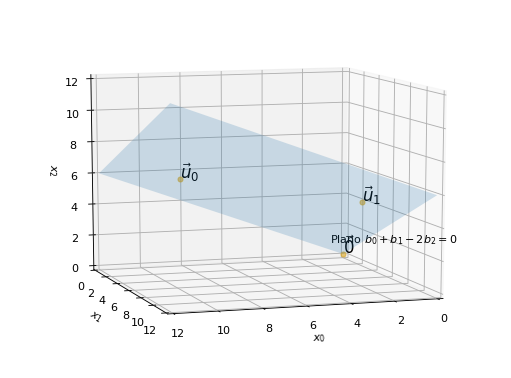

In [22]:
fig,ax=ejes3d(0,0,0,12,12,12)  # Define el eje de coordenadas
                              # Desde la coordenada (0,0,0)ₜ
                              # Hasta la coordenada (10,10,10)ₜ
u=sp.Matrix([9,3,6])
v=sp.Matrix([2,8,5])

punto3d(ax,u,nombre=r'$\vec{u}_0$')  # Coloca el punto
punto3d(ax,v,nombre=r'$\vec{u}_1$')  # Coloca el punto
plano3d(ax,u,v,color='k')
ax.text(1,1,1,r'Plano $b_0 + b_1 -2b_2=0$',rotation=24)


animacion3d(fig,ax)  # Genera la animación para rotar  

Observe que el sistema es consistente solamente si $b_0 + b_1 -2b_2=0$. Esto nos permite visualizar como <u> una ecuación lineal con tres variables </u> (con el término constante igual a cero) puede correponder a <u>un plano que pasa por el origen</u>. 

## Estudio de caso cuando no genera todo el espacio.

$x_1\left(\begin{matrix}9\\3\\6\end{matrix}\right) + x_2 \left(\begin{matrix}3\\1\\2\end{matrix}\right)=\begin{pmatrix}b_0\\b_1\\b_2\end{pmatrix}$

$x_1\left(\begin{matrix}9\\3\\6\end{matrix}\right) + x_2 \left(\begin{matrix}2\\8\\5\end{matrix}\right)=\begin{pmatrix}b_0\\b_1\\b_2\end{pmatrix}$

In [23]:
Ab_otramas=sp.Matrix([[9,3,b0],[3,1,b1],[6,2,b2]])
Ab_otramas

Matrix([
[9, 3, b_0],
[3, 1, b_1],
[6, 2, b_2]])

In [24]:
M=Ab_otramas
M

Matrix([
[9, 3, b_0],
[3, 1, b_1],
[6, 2, b_2]])

In [25]:
M.row_swap(0,1)
M

Matrix([
[3, 1, b_1],
[9, 3, b_0],
[6, 2, b_2]])

In [26]:
M[1,:]+=M[0,:]*(-3)
M[2,:]+=M[0,:]*(-2)
M

Matrix([
[3, 1,          b_1],
[0, 0,  b_0 - 3*b_1],
[0, 0, -2*b_1 + b_2]])

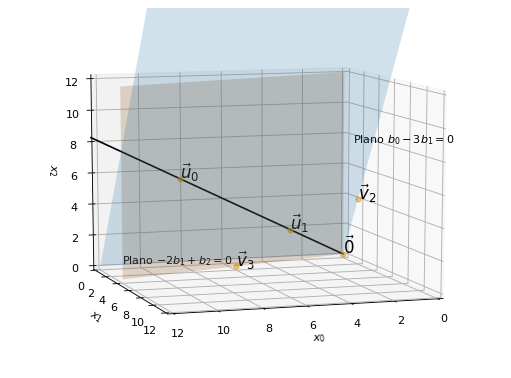

In [27]:
fig,ax=ejes3d(0,0,0,12,12,12)  # Define el eje de coordenadas
                              # Desde la coordenada (0,0,0)ₜ
                              # Hasta la coordenada (10,10,10)ₜ
u=sp.Matrix([9,3,6])
v_bis1=sp.Matrix([3,1,2])
v_bis2=sp.Matrix([0,2,4])
v_bis3=sp.Matrix([6,2,0])

punto3d(ax,u,nombre=r'$\vec{u}_0$')  # Coloca el punto
punto3d(ax,v_bis1,nombre=r'$\vec{u}_1$')  # Coloca el punto
punto3d(ax,v_bis2,nombre=r'$\vec{v}_2$')  # Coloca el punto
punto3d(ax,v_bis3,nombre=r'$\vec{v}_3$')  # Coloca el punto
plano3d(ax,u,v_bis2,color='k')
linea3d(ax,1.5*u)  # Coloca  las línea entre dos extremos, si solo hay un extremo el otro es el origen
ax.plot_surface([[0,0],[12,12]],[[0,0],[4,4]], np.array([[0.,12.],[0.,12.]]), alpha=0.2)#Plano vertical dibujado manualmente
ax.text(1,4,8,r'Plano $b_0 - 3b_1 =0$',rotation=24)
ax.text(12,4,1,r'Plano $-2 b_1 +b_2=0$',rotation=24)



animacion3d(fig,ax)#,fps=10,segundos=1)  # Genera la animación para rotar  

Ahora para que el sistema sea consistente debe cumplir dos ecuaciones. Primero que  $b_0 - 3b_1 =0$ y segundo que $-2 b_1 +b_2=0$. Esto nos permite visualizar como cada ecuación lineal con tres variables (con el término constante igual a cero)  representa un plano que pasa por el origen. <u>La intersección de estos dos planos corresponde a una recta</u> 

A continuación, estudiaremos los sistemas de ecuaciones con el vector de términos constantes (VTC)  igual al vector cero.

# Sistema Homogéneo

## Definición

Un **sistema homogéneo (SH)** es un sistema de ecuaciones lineales donde sus términos constantes son cero. 

$[A:\vec{0}]$

Todo sistema de ecuaciones lineales $[A:\vec{b}]$ tiene un **sistema homogéneo asociado** dado por $[A:\vec{0}]$

## Ejemplo
A continuación, presentaremos diversas notaciones del sistema de ecuaciones homogéneo y no homogéneo. 

Sistema de ecuaciones no homogéneo.

$\begin{matrix}
x_1 & - &  8x_2 &  &  & + & 7x_4 &  & & =&9\\
-2x_1& + & 16x_2 & -& 1x_3& - &20tx_4 &  & & =&-24\\
2x_1&- &16x_2  &+ &6x_3 &+  &50x_4 &+&1x_5& =&51
\end{matrix}$

Sistema de ecuaciones homogéneo.

$\begin{matrix}
x_1 & - &  8x_2 &  &  & + & 7x_4 &  & & =&0\\
-2x_1& + & 16x_2 & -& 1x_3& - &20tx_4 &  & & =&0\\
2x_1&- &16x_2  &+ &6x_3 &+  &50x_4 &+&1x_5& =&0
\end{matrix}$

Combinación lineal no homogénea.

$x_1\begin{pmatrix} 1 \\ -2 \\ 2 \end{pmatrix}+ 
x_2\begin{pmatrix} -8 \\ 16 \\ -16 \end{pmatrix}+ 
x_3\begin{pmatrix} 0\\ -1 \\ 6\end{pmatrix}+ 
x_4\begin{pmatrix} 7\\ -20 \\50 \end{pmatrix}+ 
x_5\begin{pmatrix} 0\\ 0 \\ 1\end{pmatrix}= 
\begin{pmatrix} 9\\ -24 \\51 \end{pmatrix} $

Combinación lineal homogénea.

$x_1\begin{pmatrix} 1 \\ -2 \\ 2 \end{pmatrix}+ 
x_2\begin{pmatrix} -8 \\ 16 \\ -16 \end{pmatrix}+ 
x_3\begin{pmatrix} 0\\ -1 \\ 6\end{pmatrix}+ 
x_4\begin{pmatrix} 7\\ -20 \\50 \end{pmatrix}+ 
x_5\begin{pmatrix} 0\\ 0 \\ 1\end{pmatrix}= 
\begin{pmatrix} 0\\ 0 \\0 \end{pmatrix} $

Matriz por vector no homogénea.

$\begin{bmatrix} 1 & -8 & 0 & 7 & 0 \\
                  -2 & 16 & -1&-20& 0 \\
                   2 &-16 & 6 & 50& 1 
\end{bmatrix}
\begin{pmatrix} x_1\\ x_2 \\ x_3 \\x_4 \\x_5 \end{pmatrix}
=\begin{pmatrix} 9\\ -24 \\ 51  \end{pmatrix}$

Matriz por vector homogénea.

$\begin{bmatrix} 1 & -8 & 0 & 7 & 0 \\
                  -2 & 16 & -1&-20& 0 \\
                   2 &-16 & 6 & 50& 1 
\end{bmatrix}
\begin{pmatrix} x_1\\ x_2 \\ x_3 \\x_4 \\x_5 \end{pmatrix}
=\begin{pmatrix} 0\\ 0 \\ 0  \end{pmatrix}$



# Espacio nulo de la matriz $A$

## Definición
El conjunto solución del sistema homogéneo $[A:\vec{0}]$, se llama el **espacio nulo** de la matriz $A$ y se denota 

$\text{Nu}(A)=\{\vec{x} \mid A\vec{x}=\vec{0}, \text{ además, } \vec{x} \in \mathbb{R}^n \}$.

La anterior definición respondería la pregunta ¿cuáles son los vectores $\vec{x}$ que al ser multiplicados por una matriz $A$ dan el vector cero?

## Teorema
El espacio nulo de una matriz $A$ de tamaño $m \times n$ es un subespacio de $\mathbb{R}^n$



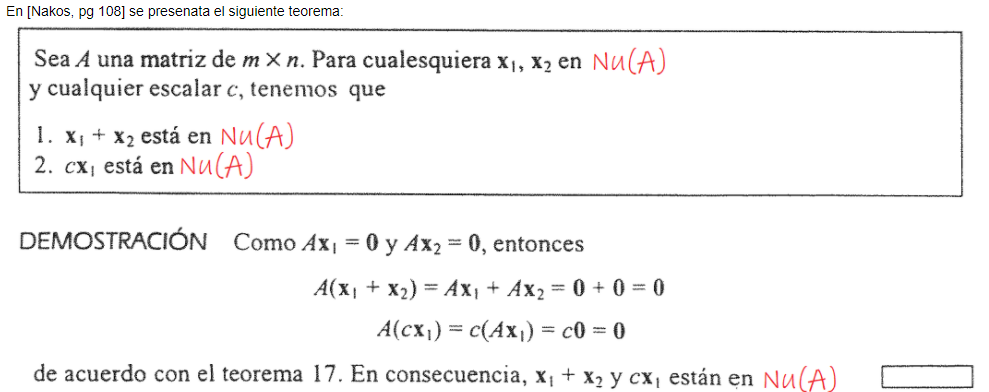

### Nota
Observe que el espacio nulo está formado por los valores de las variables que hacen que las ecuaciones den cero. Como hay $n$ variables, una por cada columna de $A$, entonces el espacio nulo pertenece a $\mathbb{R}^n$ 

### Nota
Como el espacio nulo de $A$ es un subespacio de $\mathbb{R}^n$, se puede escribir como el espacio columna de alguna matriz $C$ ¿Cómo se puede encontrar esa matriz $C$?

Precisamente las columnas de esa matriz pueden ser las soluciones particulares básicas obtenidas al resolver el sistema de ecuaciones.
## Ejemplo
Vamos a encontrar la solución general de la matriz $[A:b]$ dada por

In [29]:
import sympy as sp
b0,b1,b2=sp.symbols('b_0 b_1 b_2')

A=sp.Matrix([
    [1 ,-8 ,0 ,7  ,0 ,b0 ],
    [-2,16 ,-1,-20,0,b1],
    [2 ,-16,6 ,50 ,1,b2 ]
])
A

Matrix([
[ 1,  -8,  0,   7, 0, b_0],
[-2,  16, -1, -20, 0, b_1],
[ 2, -16,  6,  50, 1, b_2]])

Lo cual significa que debemos solucionar el sistema homogéneo $[A:\vec{0}]$

In [32]:
M=A[:,:]
M

Matrix([
[ 1,  -8,  0,   7, 0, b_0],
[-2,  16, -1, -20, 0, b_1],
[ 2, -16,  6,  50, 1, b_2]])

Ya que este es el sistema homogéneo del sistema de ecuaciones inicial entonces se pueden usar los mismos pasos para encontrar la forma escalón 

In [33]:
M[1,:]+=2*M[0,:] # R1 + 2R0 ⟶ R1
M

Matrix([
[1,  -8,  0,  7, 0,         b_0],
[0,   0, -1, -6, 0, 2*b_0 + b_1],
[2, -16,  6, 50, 1,         b_2]])

In [34]:
M[2,:]-=2*M[0,:] # R2 - 2R0 ⟶ R2
M

Matrix([
[1, -8,  0,  7, 0,          b_0],
[0,  0, -1, -6, 0,  2*b_0 + b_1],
[0,  0,  6, 36, 1, -2*b_0 + b_2]])

In [35]:
M[2,:]+=6*M[1,:] # R2 + 6R1 ⟶ R2
M

Matrix([
[1, -8,  0,  7, 0,                  b_0],
[0,  0, -1, -6, 0,          2*b_0 + b_1],
[0,  0,  0,  0, 1, 10*b_0 + 6*b_1 + b_2]])

La anterior matriz extendida está en forma escalón reducida.

\begin{matrix}
x_1 & - &  8x_2 &  &  & + & 7x_4 &  & & =&b_0\\
    &   &       & -& 1x_3& - & 6x_4 &  & & =&2b_0+b_1\\
    &   &       &  &  &   &   & +&1x_5& =&10b_0+6b_1+b_2
\end{matrix}

Las variables libres $x_2, x_4$ se asignan con los parámetros $t_1, t_2$. 

Luego se despejan las variables delanteras. 

In [ ]:
def f(t,b):
    # terminos constantes
    b0=b[0]
    b1=b[1]
    b2=b[2]

    # variables libres
    x2=t[0]
    x4=t[1]
    
    # variables delanteras
    x5=(10*b0+6*b1+b2)
    x3=(2*b0+b1)-6*x4
    x1=(0)+8*x2-7*x4
    
    return sp.Matrix([x1,x2,x3,x4,x5])

Lo cual permite escribir la solución general como de la siguiente forma.

$\begin{pmatrix}x_1\\x_2\\x_3\\x_4\\x_5\end{pmatrix}
=\begin{pmatrix}0\\ 0 \\ 2b_0+b_1 \\ 0 \\ 10b_0+6b_1+b_2 \end{pmatrix}
+t_1\begin{pmatrix}8\\ 1 \\ 0 \\ 0 \\ 0 \end{pmatrix}
+t_2\begin{pmatrix}-7\\ 0 \\ -6\\ 1 \\ 0 \end{pmatrix}$



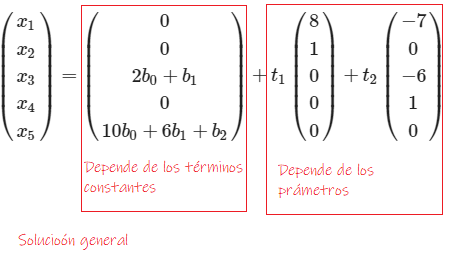

Si todos los términos constantes son cero entonces el conjunto solución se puede escribir como:
* el espacio generado por las soluciones particulares básicas.
* el espacio columna de la matriz $C$ cuyas columnas son las soluciones particulares básicas. 




$\left\{ 
t_1\begin{pmatrix}8\\ 1 \\ 0 \\ 0 \\ 0 \end{pmatrix}
+t_2\begin{pmatrix}-7\\ 0 \\ -6\\ 1 \\ 0 \end{pmatrix}
\mid t_1,t_2 \in \mathbb{R} \right\}
=\text{Ge}\left\{ 
\begin{pmatrix}8\\ 1 \\ 0 \\ 0 \\ 0 \end{pmatrix},
\begin{pmatrix}-7\\ 0 \\ -6\\ 1 \\ 0 \end{pmatrix}
\right\}
=\text{Co}\left(\begin{bmatrix}8&-7\\ 1&0 \\ 0 &-6\\ 0&1 \\ 0&0 \end{bmatrix}\right)
$

Este último es el espacio nulo de la matriz A.




Finalmente podemos concluir que $$\text{Nu}(A)=\text{Co}(C)$$
Donde 
$$A=\left[\begin{matrix}1 & -8 & 0 & 7 & 0\\-2 & 16 & -1 & -20 & 0\\2 & -16 & 6 & 50 & 1\end{matrix}\right]$$ 
y
$$C=\begin{bmatrix}8 & -7\\ 1 & 0 \\ 0 &-6 \\ 0&1 \\ 0&0 \end{bmatrix}$$ 


### Discusión 

Ya sabemos que $\text{Nu}(A)$, el espacio nulo de una matriz $A$, es un subespacio de $\mathbb{R}^n$. Además, que los subespacios tienen una dimensión. Entonces nos podemos preguntar ¿cuál es la dimensión de $\text{Nu}(A)$?

Al ver el proceso anterior podemos concluir que una base del espacio nulo de $A$ está dada por las soluciones particulares del sistema $[A:\vec{0}]$, ya que ninguna se puede eliminar porque cada una es esencial, al menos, para su respectiva variables libres. Como el número de variables libres corresponde a las columnas sin l-pivote, entonces eso permite la siguiente definición de la dimensión del espacio nulo de una matriz.

### Definición
La **nulidad** de un matriz $A$ es el número de columnas sin l-pivotes y se denota $\nu(A)$. Además, corresponde a la dimensión del espacio nulo de $A$.

$$\nu(A)=\text{Dim}(\text{Nu}(A))$$



# Teorema de la dimensión (versión matriz)

Para una matriz $A$ con n columnas. La nulidad  más el rango  da el número de columnas.

$$\nu(A) + \rho(A) = n$$




### Definición

Cuando $\nu(A)=0$ decimos que $A$ es **linialmente independiente** (LI) o lo que es lo mismo, que el conjunto de las columnas de $A$ es **linialmente independiente** (LI).


### Teorema
Para una matriz $A$ las siguientes afirmaciones equivalentes:
* $A$ es linealmente independiente (LI)
* $A$ tiene un l-pivote en cada <u>columna</u>
* El sistema homogéneo $[A:\vec{0}]$ tiene solución única.
* $\text{Nu}(A)=\{\vec{0}\}$
* $\nu(A)=0$

### Ejemplo
Las siguientes matrices tienen un (l-)pivote en cada columna.

$$\left[\begin{matrix}2 & -1 & 4 & : & 0\\2 & 4 & 10 & : & 0\\2 & -1 & 7 & : & 0\\
4& 3 & 17 & : & 0\end{matrix}\right]\sim
\left[\begin{matrix}2 & -1 & 4 & : & 0\\0 & 5 & 6 & : & 0\\0 & 0 & 3 & : & 0\\0 & 0 & 0 & : & 0\end{matrix}\right]$$

Por lo tanto, son LI


### Discusión 
Podemos ver que el anterior teorema es análogo al que vimos anteriormente, que se reescribe a continuación. 

### Teorema

Las siguientes afirmaciones son equivalentes.
* El espacio generado por los vectores columna de $A$ es todo $\mathbb{R}^m$
* $A$ tiene un l-pivote en cada <u>renglón</u>
* El sistema $[A:\vec{b}]$ es consistente para todo $\vec{b} \in  \mathbb{R}^m$.
* $\text{Co}(A)= \mathbb{R}^m$
* $\rho(A)=m$ 

Por ejemplo, las siguientes matrices tienen un (l-)pivote en cada renglón.

$\left[\begin{matrix}1 & 0 & 0 & 1 & 0 &  : & b_1\\1 & 1 & 0 & 0 & 0 &  : & b_2\\1 & 0 & 1 & 2 & -1 & : & b_3\end{matrix}\right]\sim
\left[\begin{matrix}1 & 0 & 0 & 1 & 0 &  : & b'_1\\0 & 1 & 0 & -1 & 0 & : & b'_2\\0 & 0 & 1 & 1 & -1 & : & b'_3\end{matrix}\right]$

Por lo tanto sus columnas generan todo $\mathbb{R}^m$

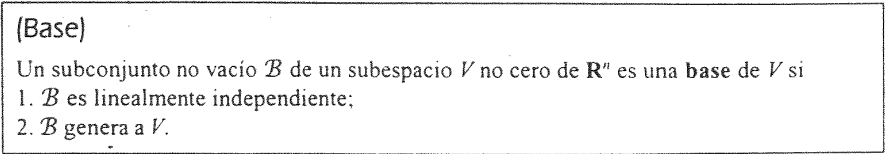

## Base estándar y dimensión de $\mathbb{R}^n$

Sabemos que la matriz identidad $I_n$ es una matriz escalar de $n \times n$ y en la diagonal hay unos. Por ejemplo:

$I_2=\begin{bmatrix}1&0\\0&1\end{bmatrix}, \ \ \ I_3=\begin{bmatrix}1&0&0\\0&1&0\\0&0&1\end{bmatrix}$

Es fácil probar que $I_n$ es base de $\mathbb{R}^n$. Esta base se llama la base estándar de $\mathbb{R}^n$. Además, como tiene $n$ columnas entonces la dimensión de $\mathbb{R}^n$ es $n$.

# Plural de vectores, Conjunto de vectores y Matriz

En este curso se pueden considerar:
* El plural de vectores $v_1, v_2, \ldots, v_n$ como un conjunto de vectores $\{v_1, v_2, \ldots, v_n\}$. 
* Un conjunto <u>ordenado</u> de vectores: $\{v_1, v_2, \ldots, v_n\}$ como una matriz cuyas columnas son vectores diferentes: $[v_1  \ \ v_2 \ \ \ldots \ \ v_n]$.

